In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Set max Columns to load to 100
pd.set_option('display.max_columns',100)

In [3]:
#Read the dataset
os.chdir("C:\\Users\\Shaheel\\Desktop\\Python_ML_CaseStudies\\Restaurant")
dataset = pd.read_csv("zomato.csv")

In [4]:
#Print the head
dataset.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
#Print the structure of dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

## Data Cleaning

In [6]:
#Rename some of the column names
dataset = dataset.rename(columns = {'listed_in(city)':'city','approx_cost(for two people)':'cost'})

In [7]:
#Print the last two unique characters of Rate to check whether the rates are given
#out of 5 or something else

unique_tot_rate = [x for x in dataset['rate'].str[-2:]]
print(list(set(unique_tot_rate)))

[nan, '-', 'EW', '/5']


In [8]:
#Rates are given out of 5
new_rest = dataset[(dataset['rate']=='NEW') | (dataset['rate'].str[-2:]=='-')]
#Check which restaurant has rate --> '-' and which restaurant has rate = 'NEW'
rest = dataset[dataset['rate'].str[-2:]=='-']
new_rest = dataset[dataset['rate']=='NEW']


#Drop new restaurants and the one which doesnot have ratings
dataset = dataset[dataset['rate'] != 'NEW']
dataset = dataset[dataset['rate'] != '-']

In [9]:
#print the shape
dataset.shape

(49440, 17)

In [10]:
#Replace rate which has '/5' with ''
dataset['rate'] = dataset['rate'].str.replace('/5','')
dataset['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: object

In [11]:
#Print unique values in cost
dataset['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '80', '50', '190', '1,700', nan, '180', '1,350', '2,200',
       '1,400', '2,000', '1,800', '1,900', '330', '2,500', '2,100',
       '3,000', '2,800', '3,400', '40', '1,250', '3,500', '4,000',
       '2,400', '2,600', '120', '1,450', '469', '70', '3,200', '60',
       '240', '6,000', '1,050', '2,300', '4,100', '5,000', '3,700',
       '1,650', '2,700', '4,500', '140', '360'], dtype=object)

In [12]:
#Replace cost that has ',' with ''
dataset['cost'] = dataset['cost'].str.replace(',','')

In [13]:
#Change the datatype of rate and cost to float
col = ['rate','cost']

for item in col:
    dataset[item] = dataset[item].astype(float)

In [14]:
#Drop some of the unwanted columns
dataset = dataset.drop(['url','address','location','phone'],axis=1)

In [15]:
#Lower the cases of categorical features
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtypes == "O"]
for feature in categorical_features:
    dataset[feature] = dataset[feature].str.lower()

## Handling missing values


In [16]:
features_with_na = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>1]
print(features_with_na)

['rate', 'rest_type', 'dish_liked', 'cuisines', 'cost']


In [17]:
#Print how much percentage of data is missing in each fetaure
for feature in features_with_na:
    print("{} :- {}%".format(feature,round(100*dataset[feature].isnull().mean(),3)))

rate :- 15.726%
rest_type :- 0.455%
dish_liked :- 52.484%
cuisines :- 0.091%
cost :- 0.69%


In [18]:
#Replace some of the missings values in Rate using the ratings given in the reviews_list

dataset['rate_fill'] = dataset['reviews_list'].str[9:12]
dataset['rate_fill'] = pd.to_numeric(dataset['rate_fill'],errors = 'coerce')
dataset['rate'] = np.where(dataset['rate'].isnull(),dataset['rate_fill'],dataset['rate'])

In [19]:
#Replace rest of missing values in Rate and Cost with respective median values
for item in col:
    median_value = dataset[item].median()
    dataset[item].fillna(median_value,inplace = True)

## Handling missing values for categorical variables 

In [20]:
#Replace missing value with a new label
cat_feature_nan = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes == "O"]

#Replace missing value with a new label

def replace_cat_feature(dataset,feature):
        data = dataset.copy()
        data[feature] = data[feature].fillna('Missing')
        return data

dataset = replace_cat_feature(dataset,cat_feature_nan)

## Exploratory Data Analysis

1) How many restaurants have more than one outlet<br>
2) What are top 15 resaurants with more outlets?<br>
3) Top 15 locatities with more restaurants<br>
4) Number of restaurants that take online order<br>
5) Number of restaurants that has booking facility<br>
6) Most common type of restaurants in Bengaluru<br>
7) Top localities which has expensive restaurants<br>
8) Top localities which has cheap restaurants<br>
9) Top localities which has highly rated restaurants<br>
10) Localities which has lowly rated restaurants<br>
11) Popular restaurants based on foodies votes<br>
12) Average ratings of restaurants in Bengaluru<br>
13) How ratings and number of votes are related<br>
14) How ratings and average cost of restaurants are related<br>
15) How restaurants are rated based on online ordering facility<br>
16) How restaurants are rated based on table booking facility<br>
17) Most common cuisines served at restaurants in Bengaluru<br>
18) Top dishes liked by Bengalureans<br>
19) What are the top 10 cuisines served in Top 10 location<br>
20) Which are the top restaurants for 25 most liked dishes for Bengalureans<br>

### 1) How many restaurants have more than one outlet

In [21]:
more_restaurants = dataset['name'].value_counts()
print("Number of unique restaurants - {}".format(dataset['name'].nunique()))
print("Restaurants that have multiple outlets - {}".format(len(more_restaurants[more_restaurants > 1])))

Number of unique restaurants - 8410
Restaurants that have multiple outlets - 7330


### 2) What are top 15 resaurants with more outlets?

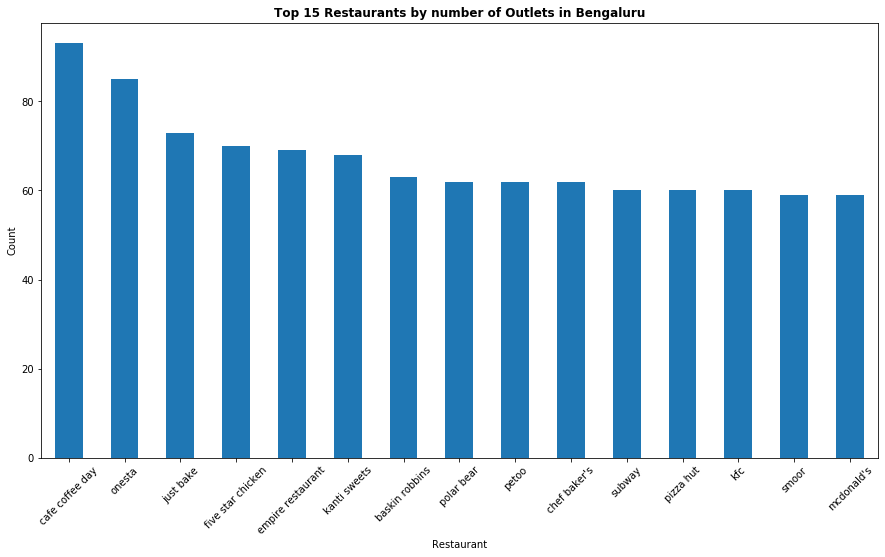

In [22]:
plt.figure(figsize=(15,8))
a = dataset['name'].value_counts().nlargest(15).plot(kind = 'bar')
plt.xlabel('Restaurant')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Top 15 Restaurants by number of Outlets in Bengaluru',weight='bold')
plt.show()

Cafe Coffee Day and Onesta have more restaurants oulet in Bengaluru in excess of 80 outlets

### 3) Top 15 locatities with more restaurants

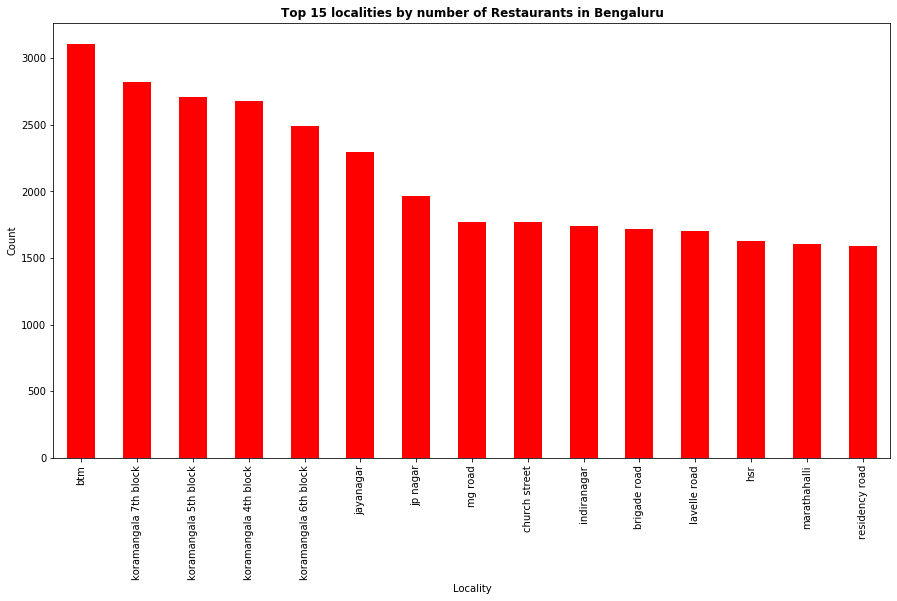

In [24]:
plt.figure(figsize=(15,8))
a = dataset['city'].value_counts().nlargest(15).plot(kind = 'bar',color='#ff0000')
plt.xlabel('Locality')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Top 15 localities by number of Restaurants in Bengaluru',weight='bold')
plt.show()

BTM has more number of restaurants in Bengaluru with more than 3000 restaurants followed by Kormangala 7th and 5th block

### 4) Percentage of restaurants that take online order

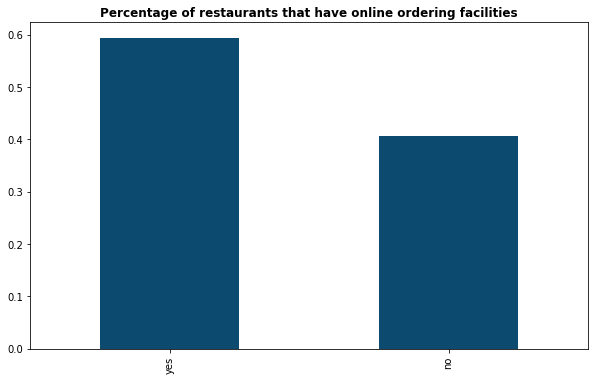

In [36]:
plt.figure(figsize = (10,6))
groupby_online_order = dataset['online_order'].value_counts(normalize=True).plot(kind = 'bar',color='#0d4a6f')
plt.title('Percentage of restaurants that have online ordering facilities',weight = 'bold')
plt.show()

Almost 60% of restaurants in Bengaluru take online orders.

### 5) Percentage of restaurants that has booking facility

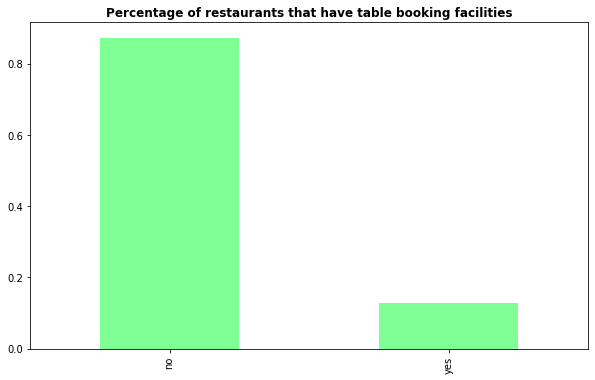

In [37]:
plt.figure(figsize = (10,6))
groupby_book = dataset['book_table'].value_counts(normalize=True).plot(kind = 'bar',color='#7fff94')
plt.title('Percentage of restaurants that have table booking facilities',weight = 'bold')
plt.show()

Almost 90% of the restaurants in Bengaluru doesn'y have table booking facility.

### 6) Most common type of restaurants in Bengaluru

Text(0.5, 1.0, 'Type of restaurants in Bengaluru')

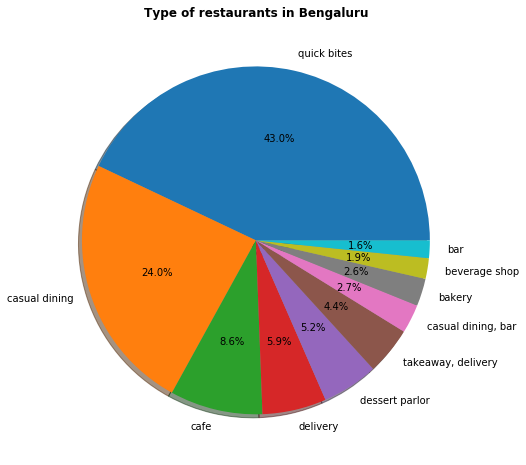

In [38]:
plt.figure(figsize = (15,8))
names = dataset['rest_type'].value_counts().nlargest(10).index
values = dataset['rest_type'].value_counts().nlargest(10).values
plt.pie(values,labels=names, autopct='%1.1f%%', shadow=True)
plt.title('Restaurent Type', weight = 'bold')
plt.title('Type of restaurants in Bengaluru',weight='bold')

67% of restaurants in Bengaluru are of Quick bites and Casual dining type

### 7) Top localities which has expensive restaurants

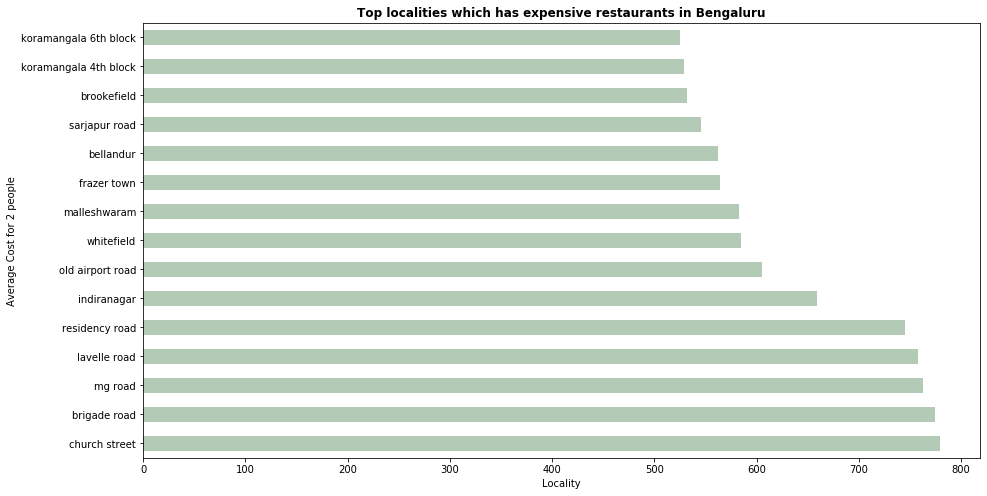

In [43]:
plt.figure(figsize=(15,8))
temp = dataset.groupby('city')['cost'].mean().sort_values(ascending=False).head(15).plot(kind = 'barh',color = '#b2cab6')
plt.xlabel('Locality')
plt.ylabel('Average Cost for 2 people')
plt.xticks()
plt.title('Top localities which has expensive restaurants in Bengaluru',weight='bold')
plt.show()

Church Street, Brigade Road, MG Road, Lavelle Road, Residency Road has the most expensive restaurants in Bengaluru

### 8) Top localities which has cheap restaurants

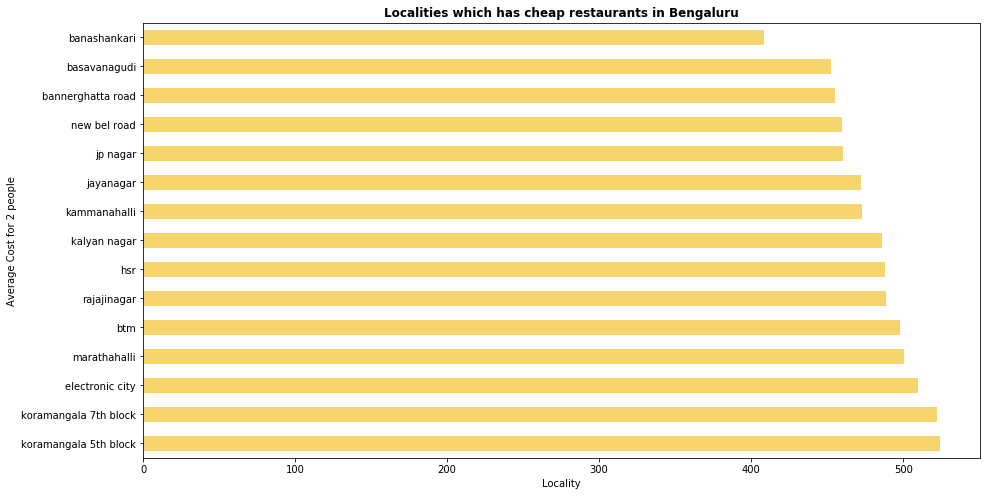

In [44]:
plt.figure(figsize=(15,8))
temp = dataset.groupby('city')['cost'].mean().sort_values(ascending=False).tail(15).plot(kind = 'barh',color = '#f6d66c')
plt.xlabel('Locality')
plt.ylabel('Average Cost for 2 people')
plt.xticks()
plt.title('Localities which has cheap restaurants in Bengaluru',weight='bold')
plt.show()

Banshankari, Basavanagudi, Bannerghatta Road has the cheapest restaurants in Bengaluru

### 9) Top localities which has highly rated restaurants

Text(0.5, 1.0, 'Locality that has highly rated restaurants')

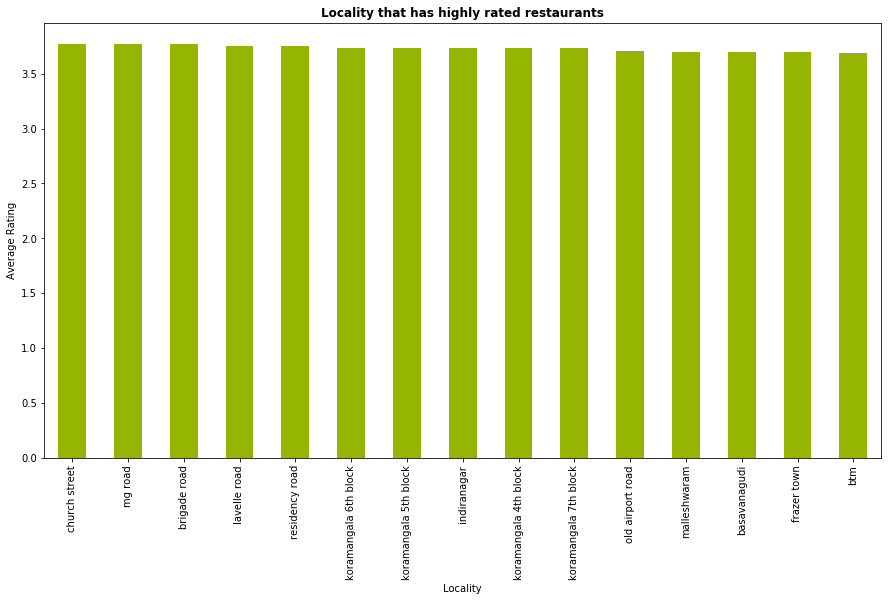

In [46]:
plt.figure(figsize=(15,8))
dataset.groupby('city')['rate'].mean().sort_values(ascending=False).head(15).plot(kind = 'bar', color = '#95b600')
plt.xlabel('Locality')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.title('Locality that has highly rated restaurants',weight='bold')

Church Street, MG Road, Brigade Road, Lavelle Road, Residency Road has highly rated restaurants in Bengaluru



### 10) Localities which has lowly rated restaurants

Text(0.5, 1.0, 'Locality that has lowly rated restaurants')

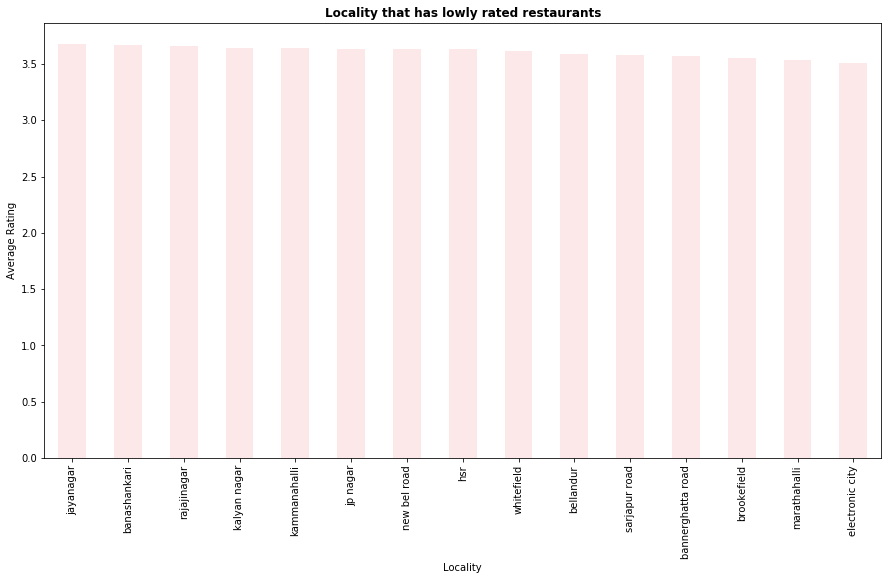

In [47]:
plt.figure(figsize=(15,8))
dataset.groupby('city')['rate'].mean().sort_values(ascending=False).tail(15).plot(kind = 'bar', color = '#fce8e8')
plt.xlabel('Locality')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.title('Locality that has lowly rated restaurants',weight='bold')

Electronic city, Marathahallii, Brookefield has least rated restaurants

### 11a) Popular restaurants(atleast 50 outlets) based on foodies votes

Text(0.5, 1.0, 'Restaurant Popularity')

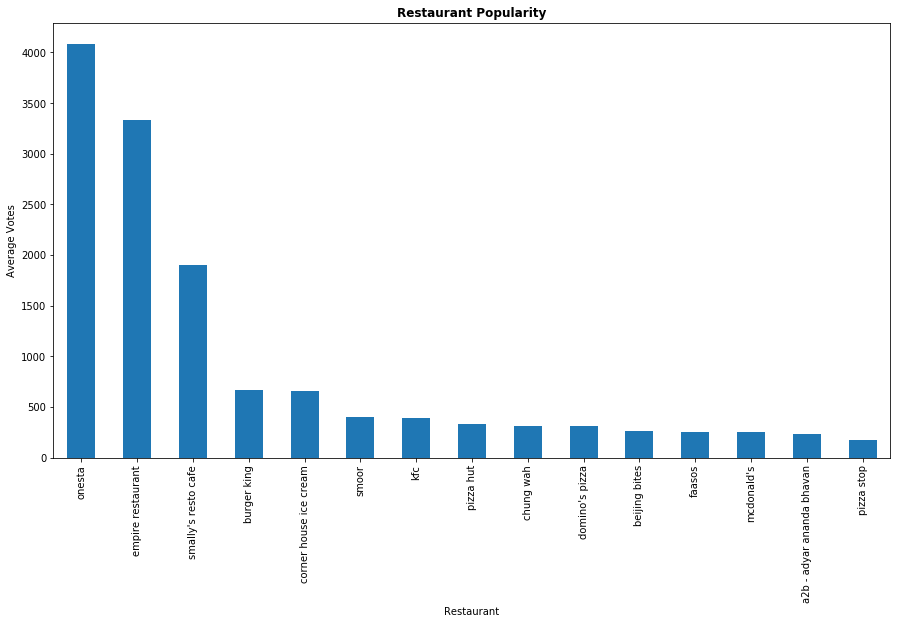

In [82]:
temp = dataset[['name','votes']]
counts = temp['name'].value_counts()
temp = temp[temp['name'].isin(counts[counts >= 50].index)]

plt.figure(figsize=(15,8))
temp.groupby('name')['votes'].mean().sort_values(ascending=False).head(15).plot.bar()
plt.xlabel('Restaurant')
plt.ylabel('Average Votes')
plt.xticks(rotation=90)
plt.title('Restaurant Popularity',weight='bold')

Among restaurants which has atleast 50 outlets in Bengaluru Onesta, Empire, Sally's resto cafe has more average footfall

### 11b) Popular restaurants(less than 50 outlets) based on foodies votes

Text(0.5, 1.0, 'Restaurant Popularity')

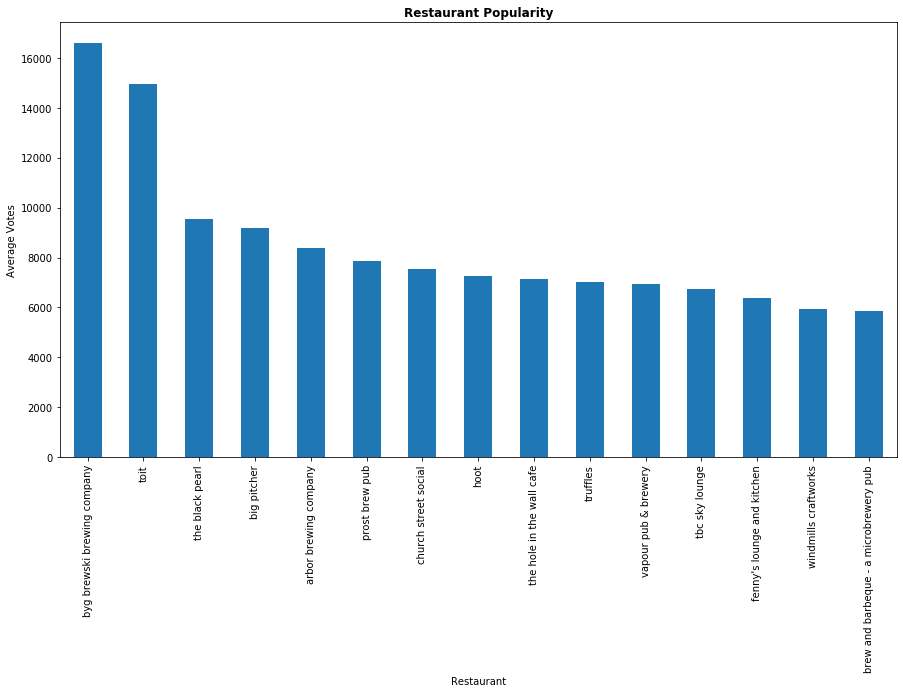

In [83]:
temp = dataset[['name','votes']]
counts = temp['name'].value_counts()
temp = temp[temp['name'].isin(counts[counts < 50].index)]

plt.figure(figsize=(15,8))
temp.groupby('name')['votes'].mean().sort_values(ascending=False).head(15).plot.bar()
plt.xlabel('Restaurant')
plt.ylabel('Average Votes')
plt.xticks(rotation=90)
plt.title('Restaurant Popularity',weight='bold')

Among restaurants which has less than 50 outlets in Bengaluru Byg Brewski, Toit, The Black Pearl has more average footfall

### 12) Average ratings of restaurants in Bengaluru

3.7


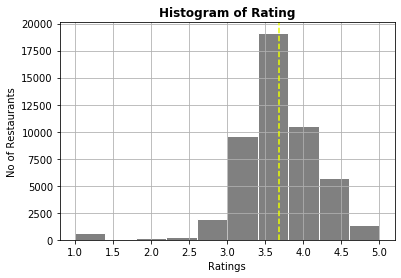

In [86]:
dataset['rate'].hist(color='grey',edgecolor='white')
plt.axvline(x=dataset['rate'].mean(),ls='--',color='#ebff00')
plt.title('Histogram of Rating',weight='bold')
plt.xlabel('Ratings')
plt.ylabel('No of Restaurants')

print(round(dataset['rate'].mean(),1)) 

Average rating of restaurants in Bengaluru follows a nearly normal distribution centered around 3.7

### 13) How ratings and number of votes are related

<Figure size 1080x576 with 0 Axes>

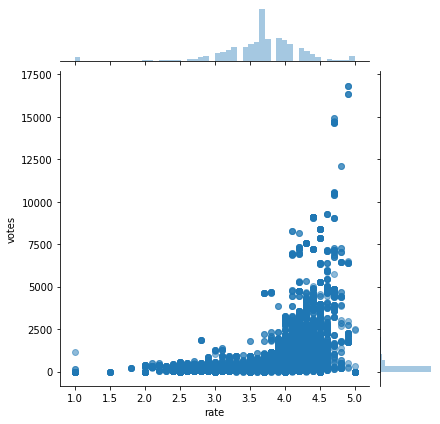

In [87]:
plt.figure(figsize=(15,8))
sns.jointplot(x = 'rate',y='votes',data= dataset,alpha = 0.5)
plt.show()

 Better the rating of the restaurant more people visit/vote the restaurant

### 14) How ratings and average cost of restaurants are related

<Figure size 1080x576 with 0 Axes>

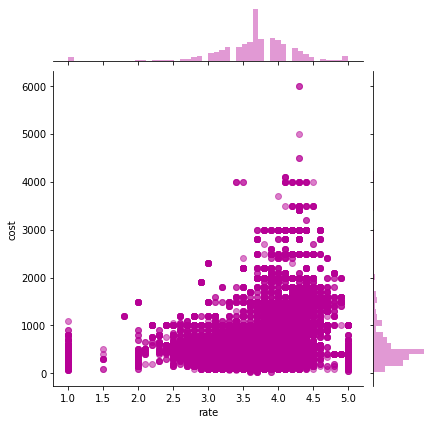

In [88]:
plt.figure(figsize=(15,8))
sns.jointplot(x = 'rate',y='cost',data= dataset,alpha = 0.5, color = '#b60095')
plt.show()

### 15) How restaurants are rated based on online ordering facility

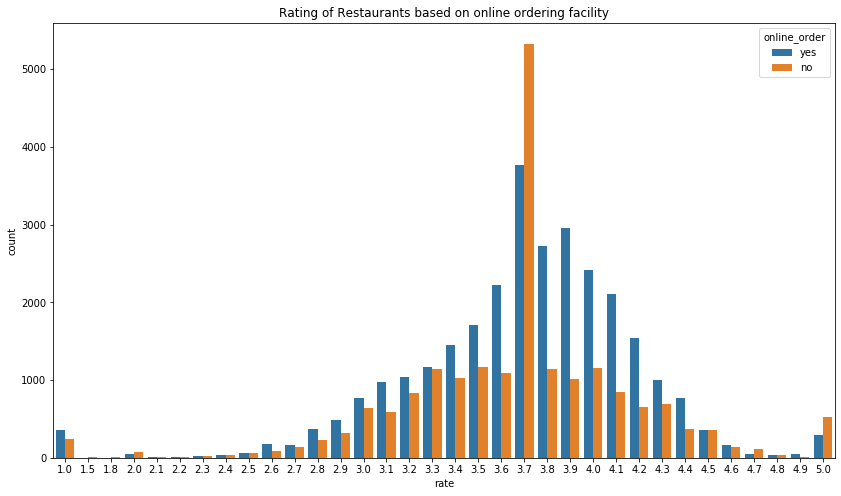

In [89]:
plt.figure(figsize = (14,8))
sns.countplot(data = dataset,x = 'rate', hue = 'online_order')
plt.title('Rating of Restaurants based on online ordering facility')
plt.show()

We can see as the ratings  increases majoraity of the restaurants have online_ordering facility

### 16) How restaurants are rated based on table booking facility

Text(0.5, 1.0, 'Rating of Restaurants based on table booking facility')

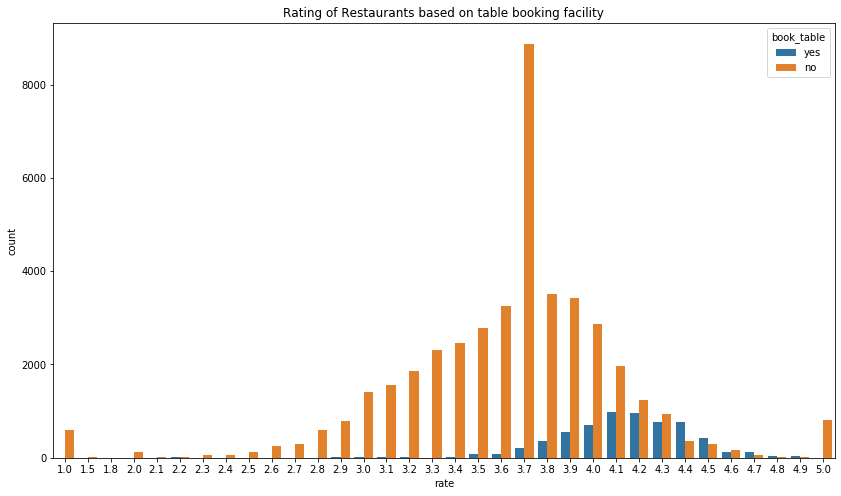

In [90]:
plt.figure(figsize = (14,8))
sns.countplot(data = dataset,x = 'rate', hue = 'book_table')
plt.title('Rating of Restaurants based on table booking facility')

There are very few restaurants with low rating that has table booking facility 
ie Restaurants which has table booking facilities are highly rated

### 17) Most common cuisines served at restaurants in Bengaluru

Text(0.5, 1.0, 'Cuisines offered by Restaurants in Bengaluru')

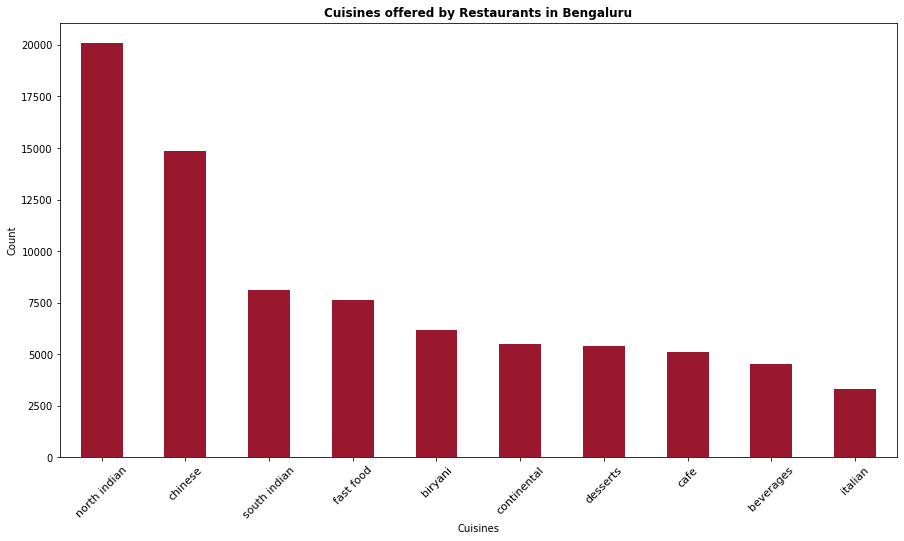

In [91]:
cuisine_count=[]

for row in dataset['cuisines']:
        for c in row.split(','):
                c=c.strip()
                cuisine_count.append(c)
                
plt.figure(figsize=(15,8))
pd.Series(cuisine_count).value_counts().nlargest(10).plot(kind='bar',color='#99182e')
plt.xlabel('Cuisines')
plt.ylabel('Count')
plt.xticks(fontsize=11, rotation = 45)
plt.title('Cuisines offered by Restaurants in Bengaluru',weight='bold')

There are nearly 20,000 restaurants which servies North Indian, which makes it the top served cusine in Bengaluru, followed by Chinese and South Indian Food.

### 18) Top dishes liked by Bengalureans

Text(0.5, 1.0, 'Top 10 dishes liked by Bengulureans')

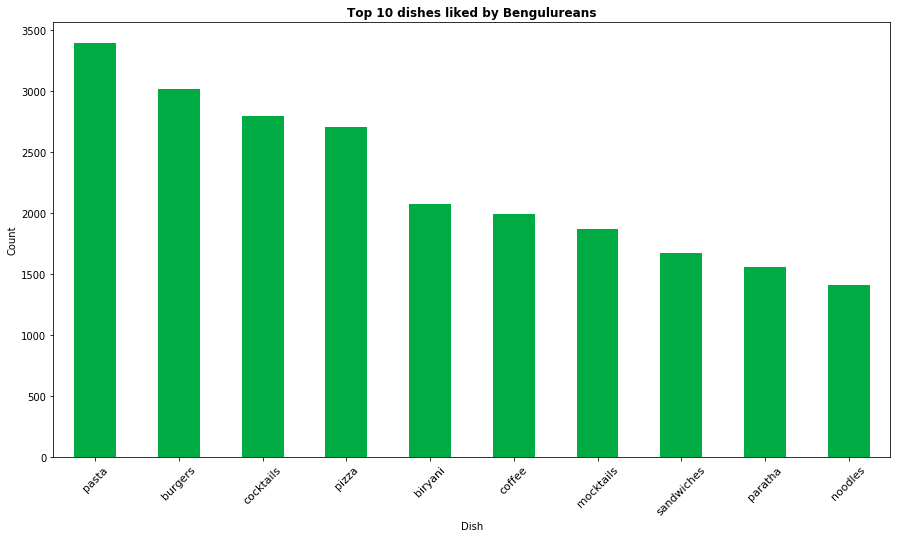

In [92]:
dish_count=[]

for row in dataset['dish_liked']:
        for c in row.split(','):
                c=c.strip()
                dish_count.append(c)

dish_count = list(filter(lambda a: a != 'Missing', dish_count))            
plt.figure(figsize=(15,8))
pd.Series(dish_count).value_counts().nlargest(10).plot(kind='bar',color='#00ab44')
plt.xlabel('Dish')
plt.ylabel('Count')
plt.xticks(fontsize=11, rotation = 45)
plt.title('Top 10 dishes liked by Bengulureans',weight='bold')

Most Preferred dish for Bengulreans are Pasta, Burgers and Cocktails

### 19) What are the top 10 cuisines served in Top 10 locality

C:\Users\Shaheel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


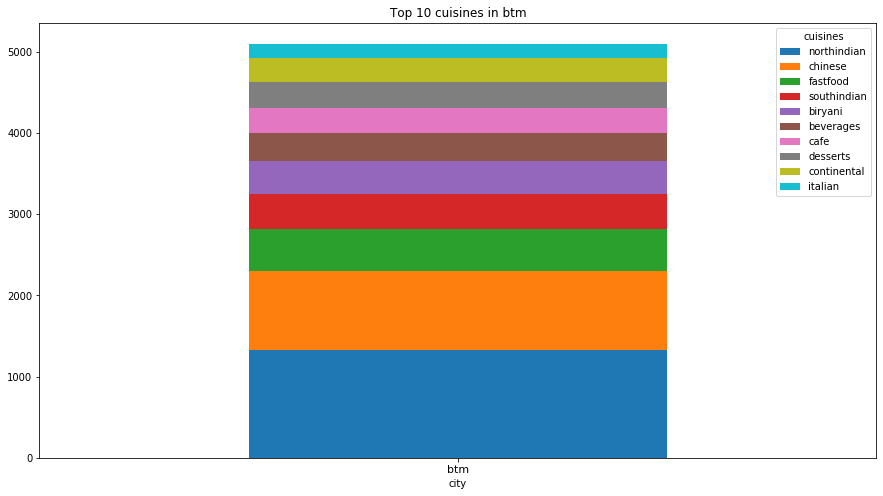

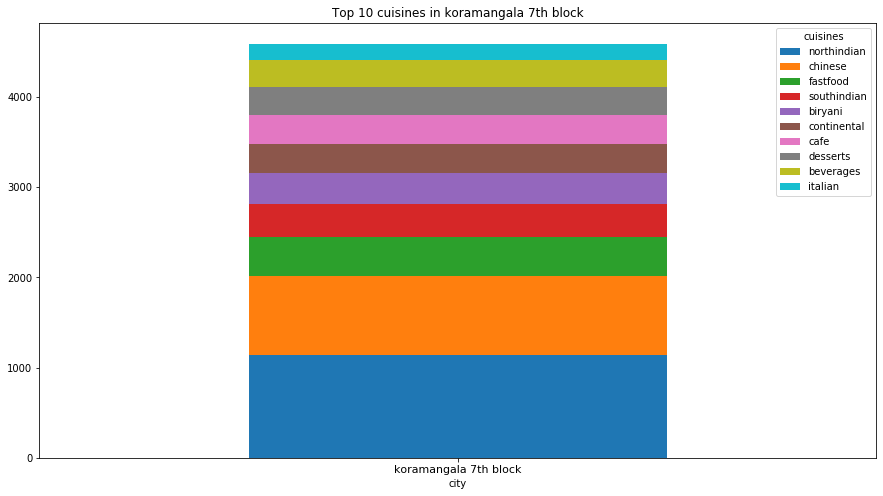

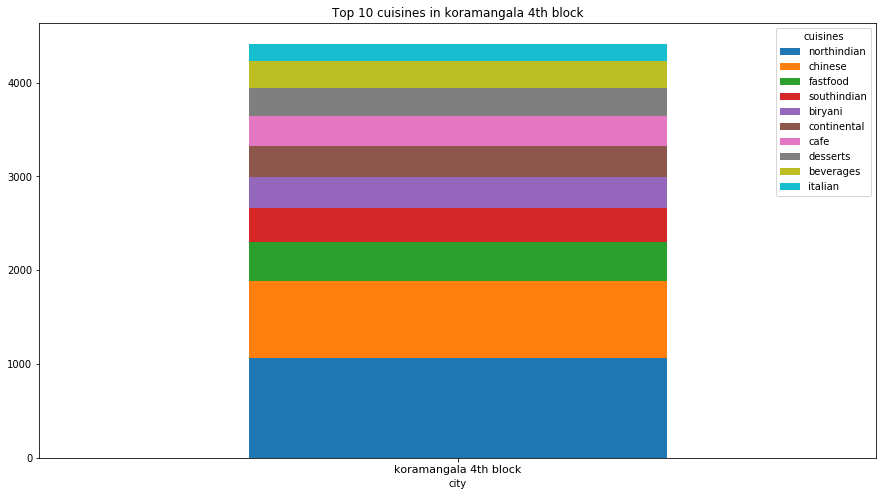

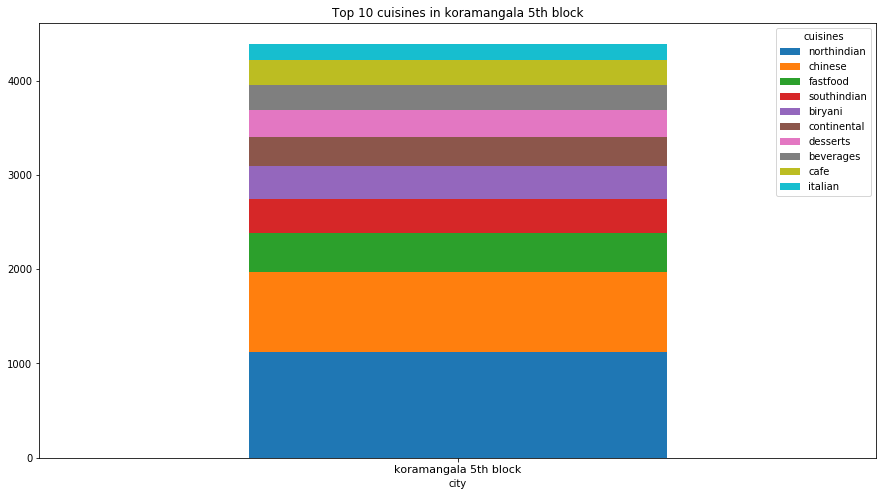

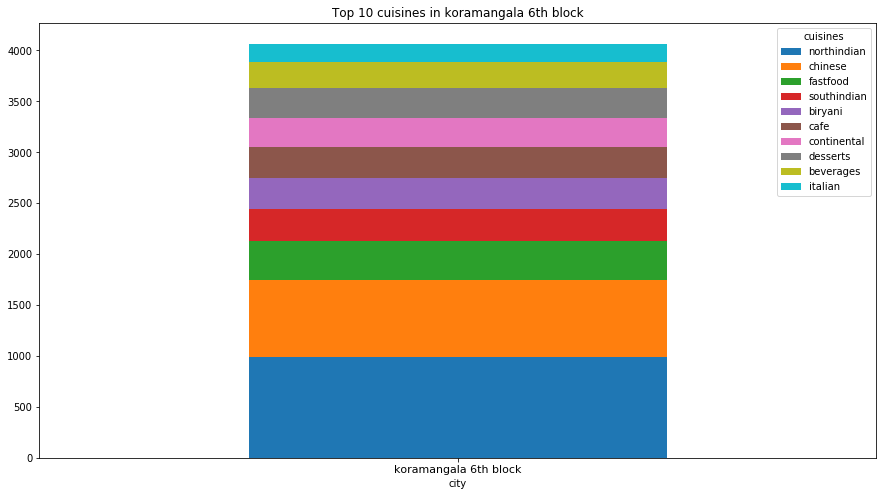

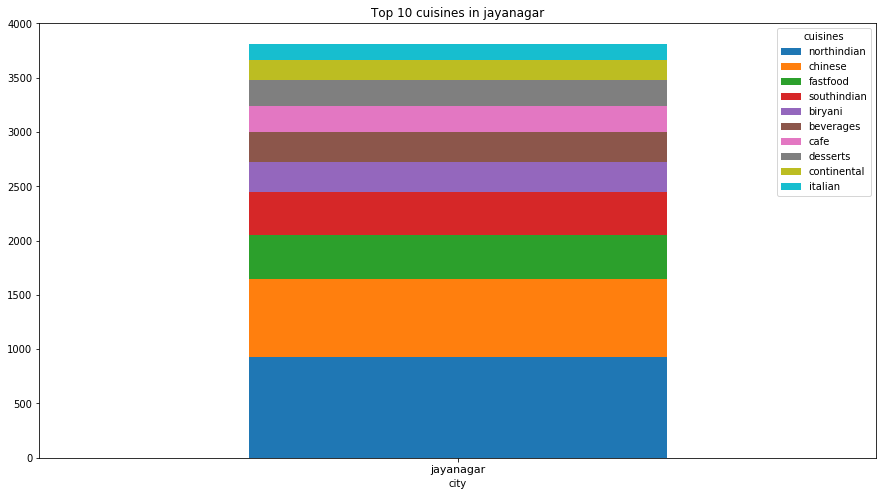

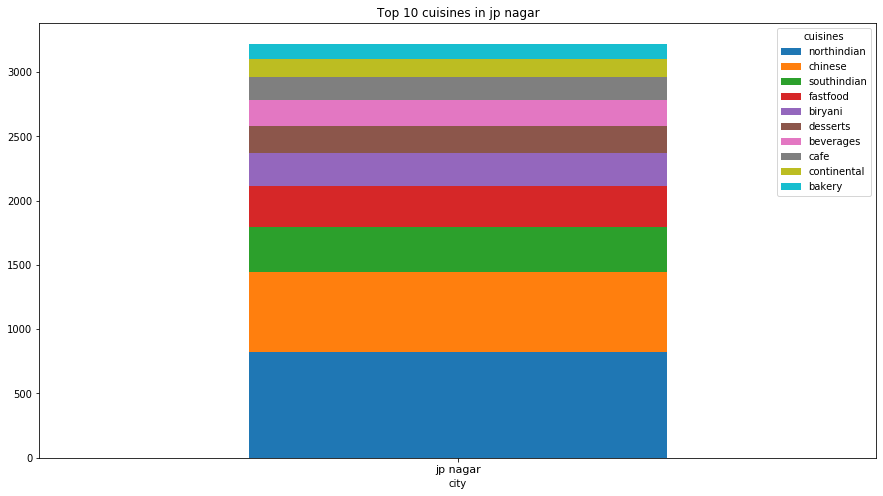

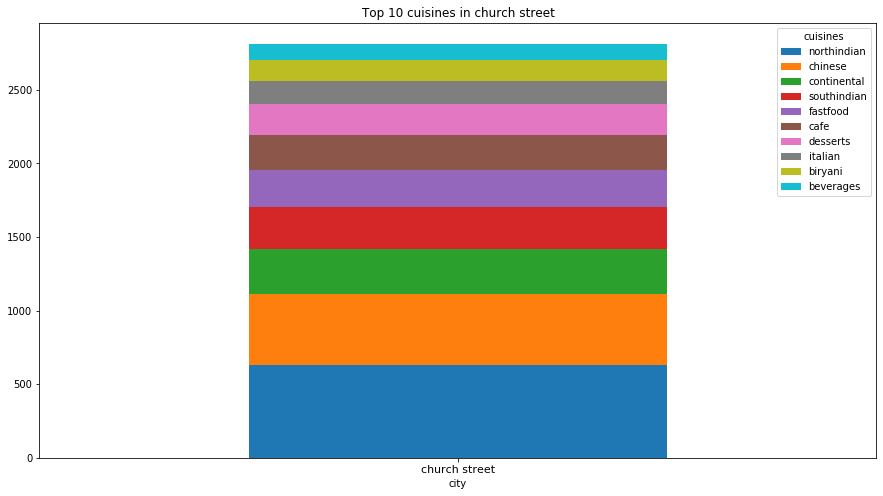

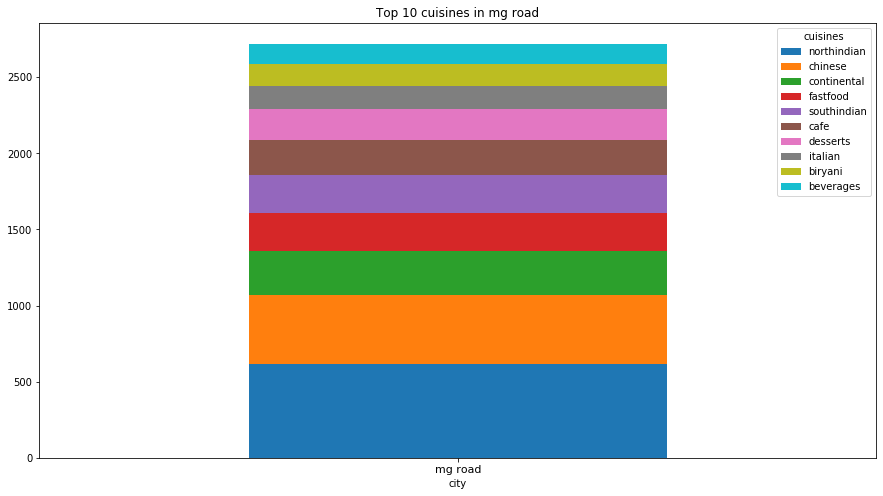

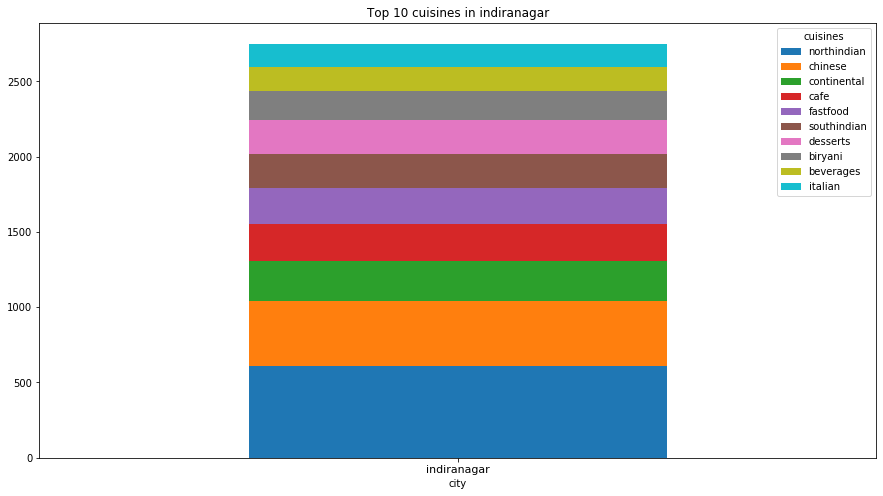

In [97]:
#Columns required
data = dataset[['city','cuisines']]

#Replace the whitespaces between the cuisines ie north indian --> northindian
data['cuisines'] = data['cuisines'].str.replace(" ","")

#Convert the comma separated values in cuisines to columns where each column is represented by a cuisine
df = data.set_index('city')['cuisines'].str.split(',',expand=True).stack().reset_index(level=1,drop=True).reset_index(name='cuisines')
df2 = df.groupby(['city','cuisines'])['city'].count().unstack('cuisines').fillna(0)

#Add a new column which represent total of each row
df2['rtotal'] = df2.sum(axis=1)

#Add a new row which represent the total of each column
df2.loc['ctotal'] = df2.sum(numeric_only=True,axis=0)

#Sort the dataframe by 'rtotal' in descending order and then sort by 'ctotal' in descending order so that we'll get sort the
#dataframe by top location and top cuisines
df2 = df2.sort_values(by=['rtotal'],ascending=False)
df2 = df2.T.sort_values('ctotal',ascending=False).T

#Remove rtotal and ctotal from the dataframe
df3 = df2.iloc[1:,1:]

#Plot the top 10 cuisines for top 10 location
for locality in df3.head(10).index:
    data = df3[df3.index==locality]
    data = data.T.sort_values(locality,ascending=False).T
    data = data.iloc[:,0:10]
    data.plot.bar(figsize=(15,8),stacked=True)
    plt.xticks(fontsize=11,rotation=0)
    plt.title("Top 10 cuisines in {}".format(locality))
    plt.show()

### 20) Which are the top restaurants for 25 most liked dishes for Bengalureans

C:\Users\Shaheel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


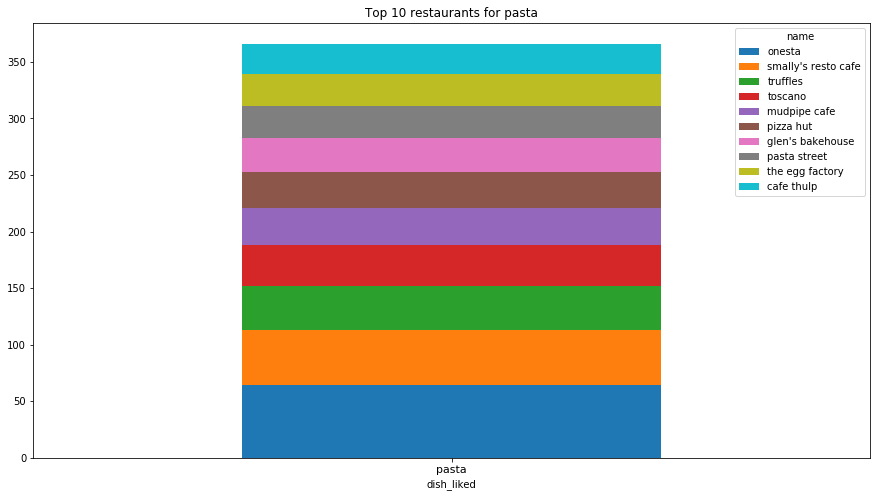

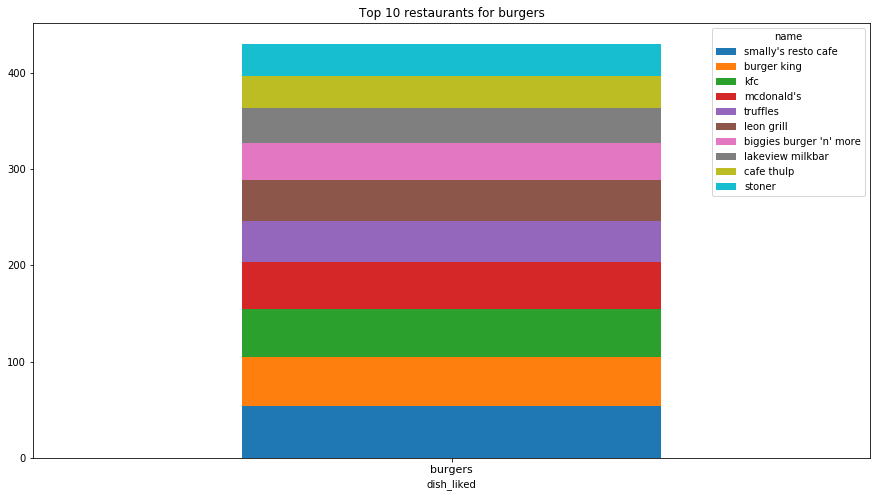

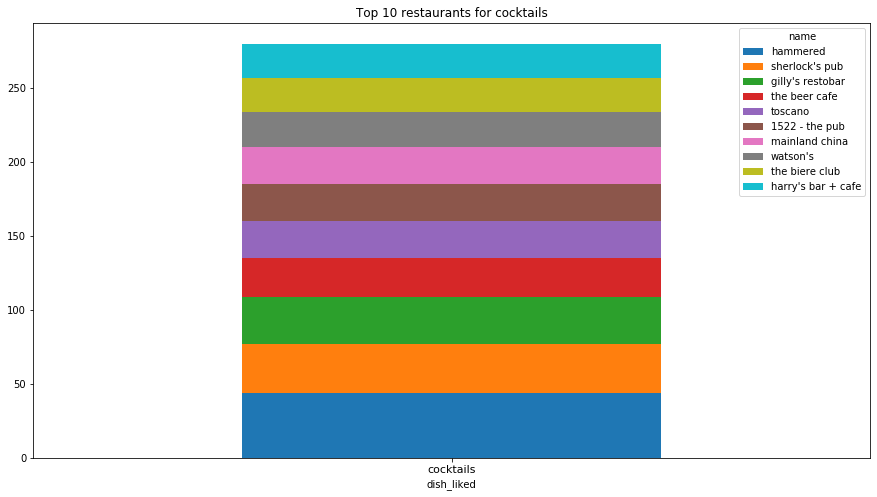

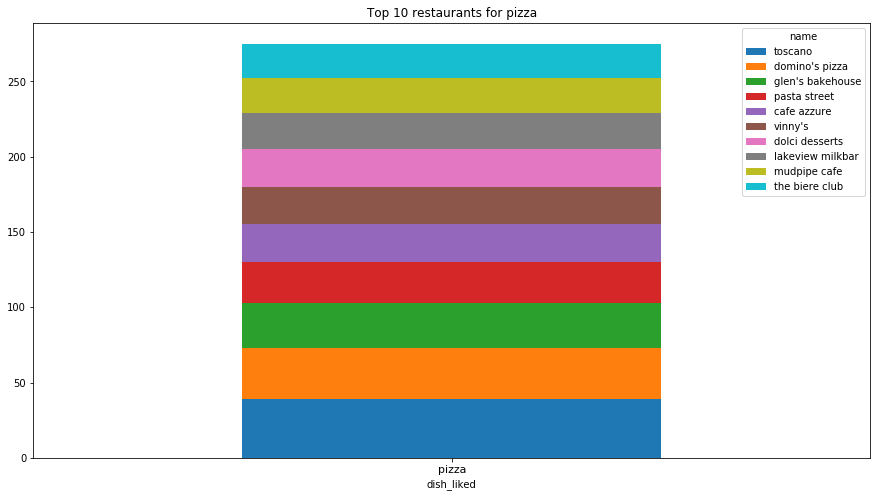

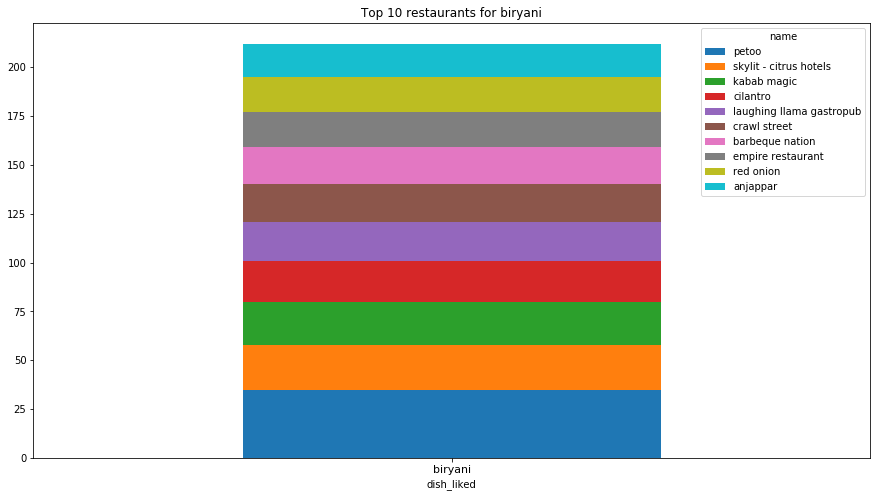

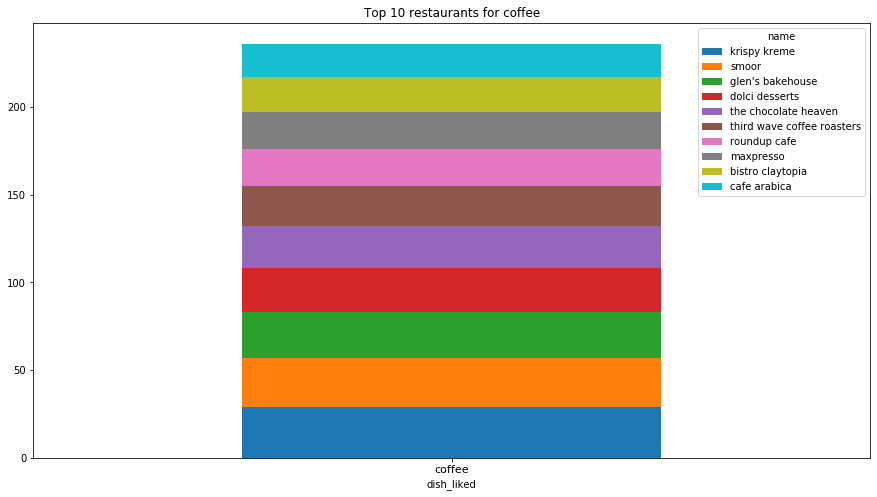

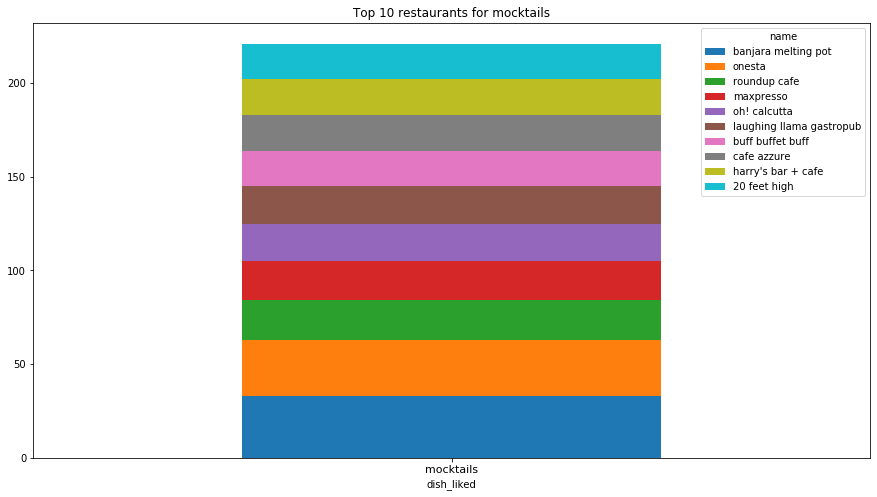

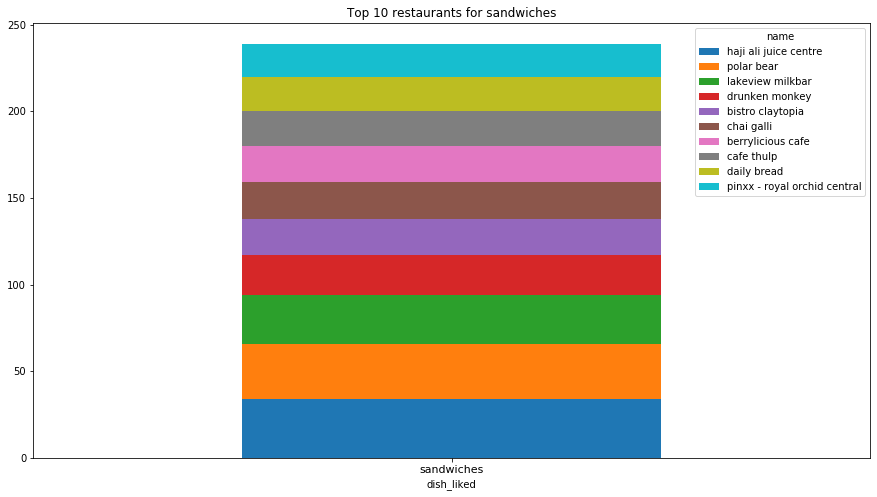

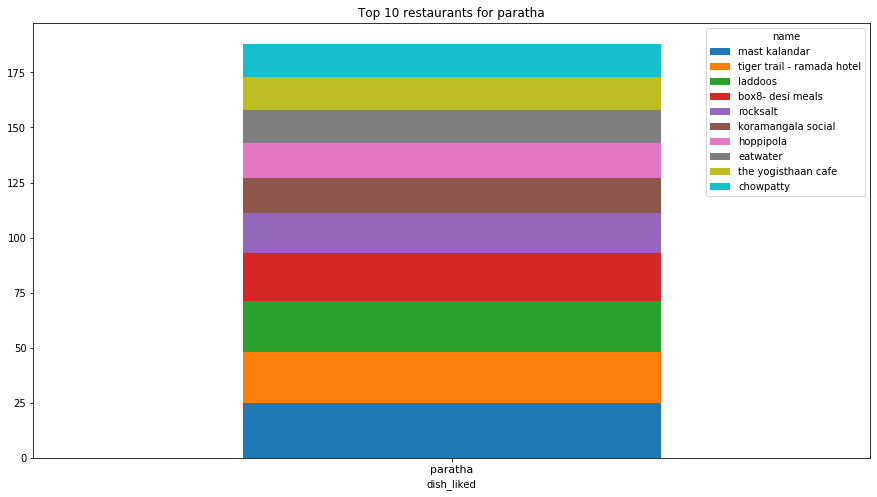

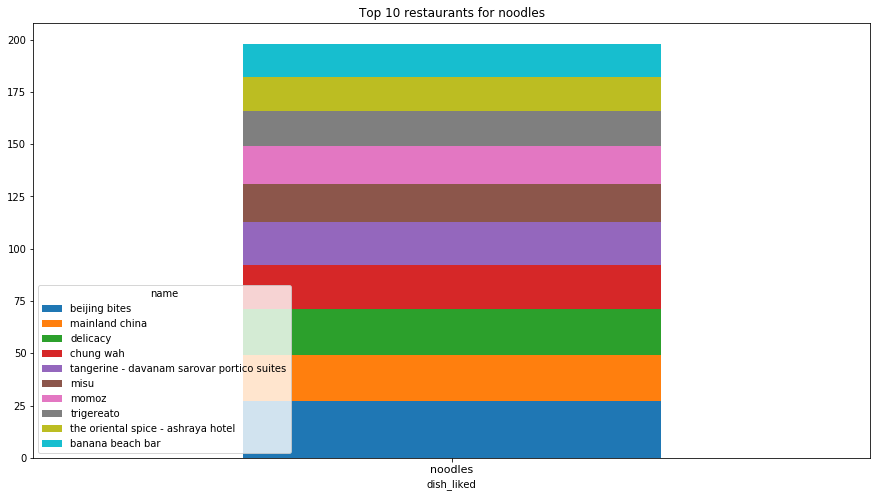

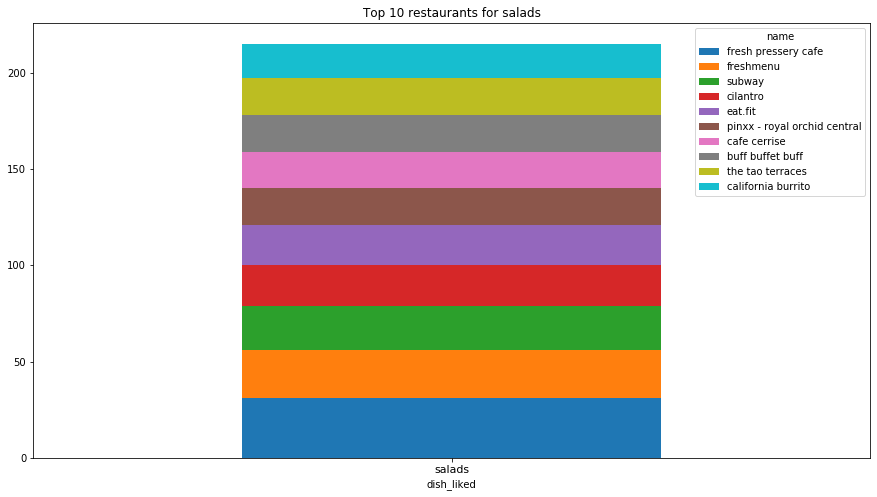

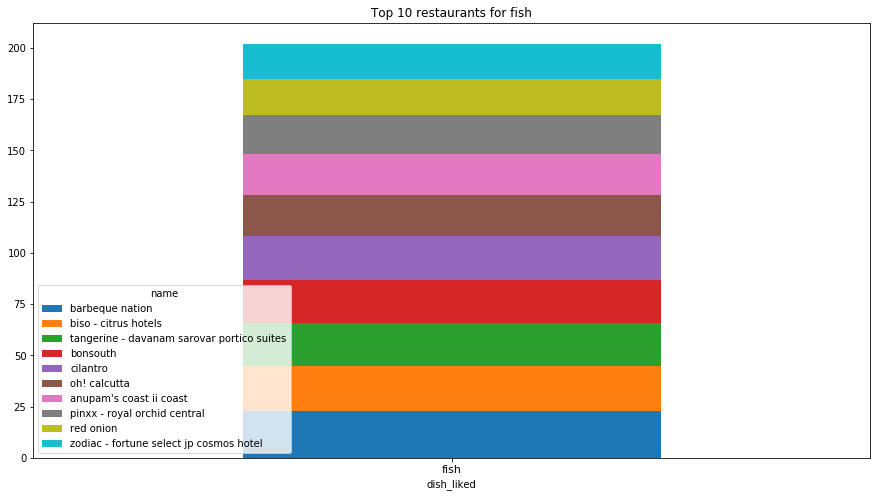

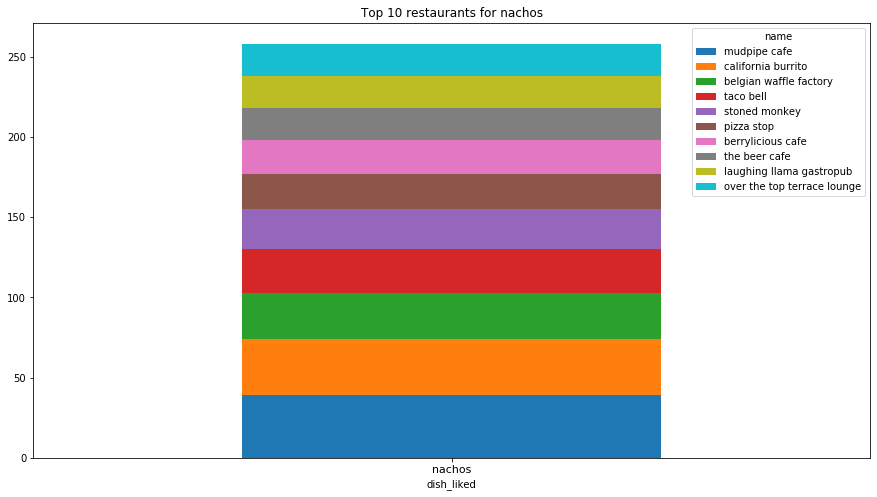

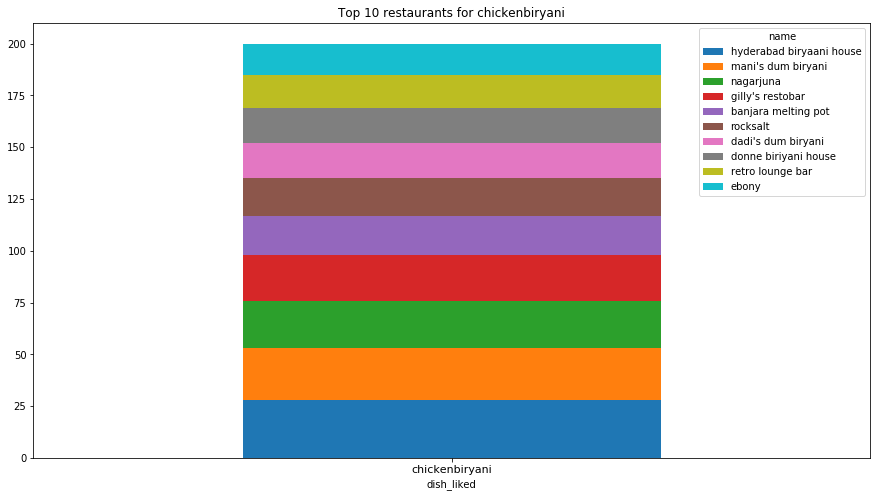

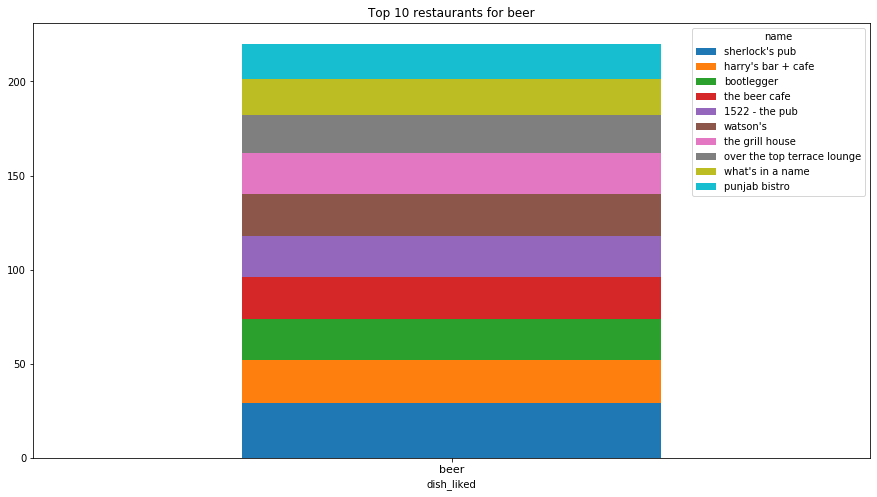

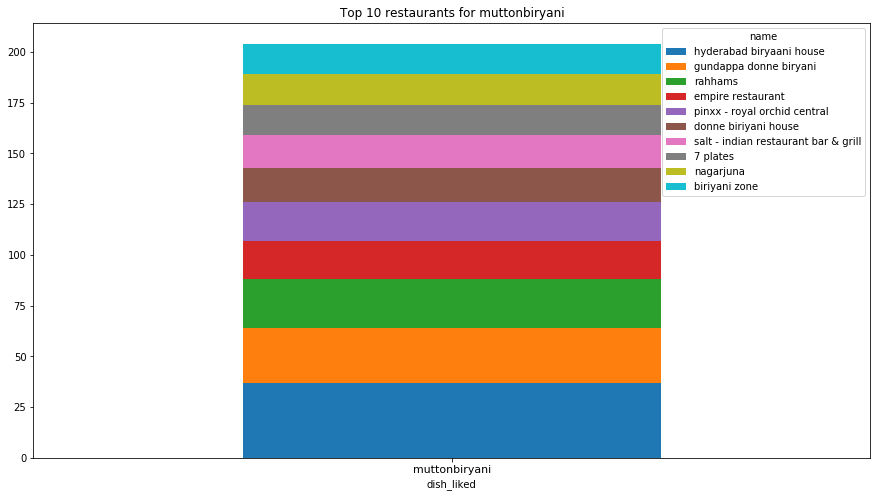

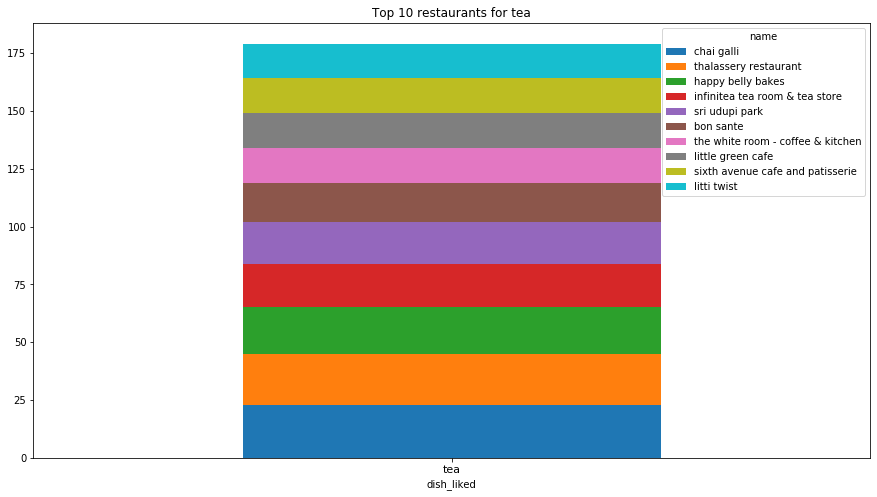

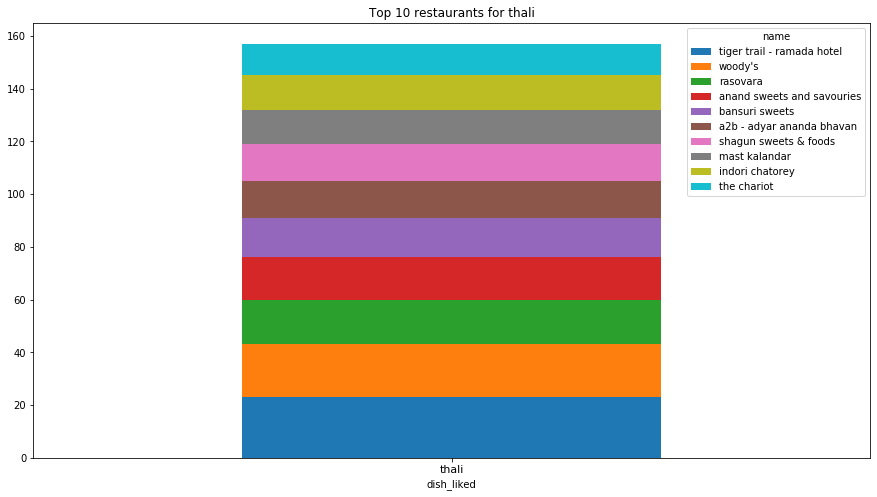

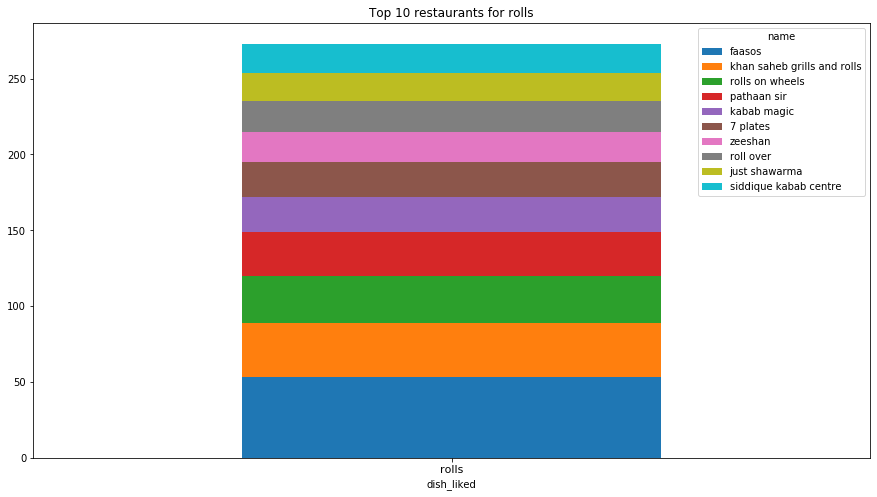

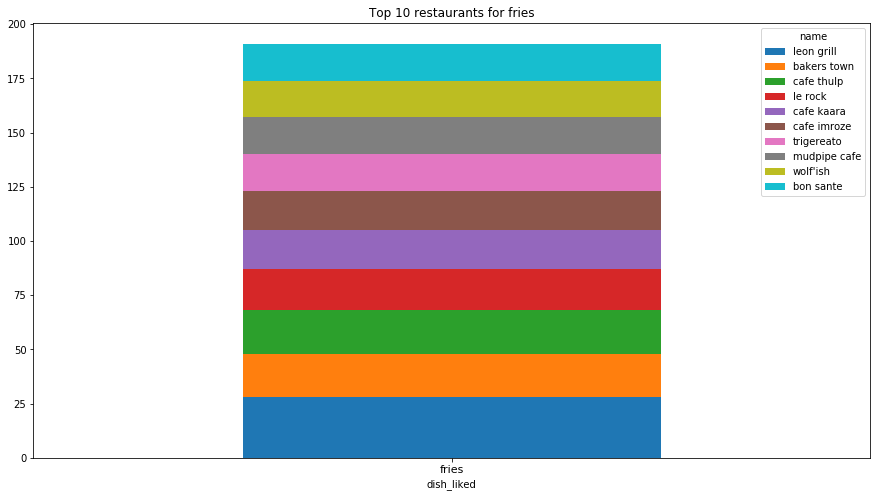

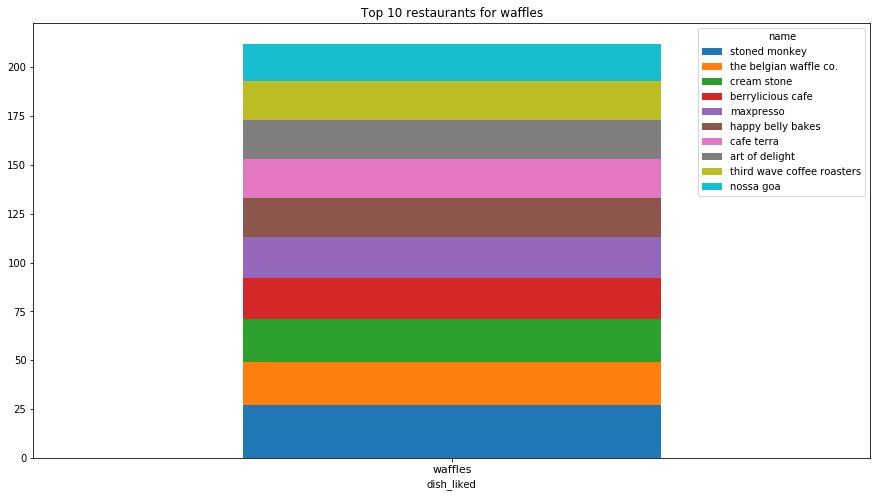

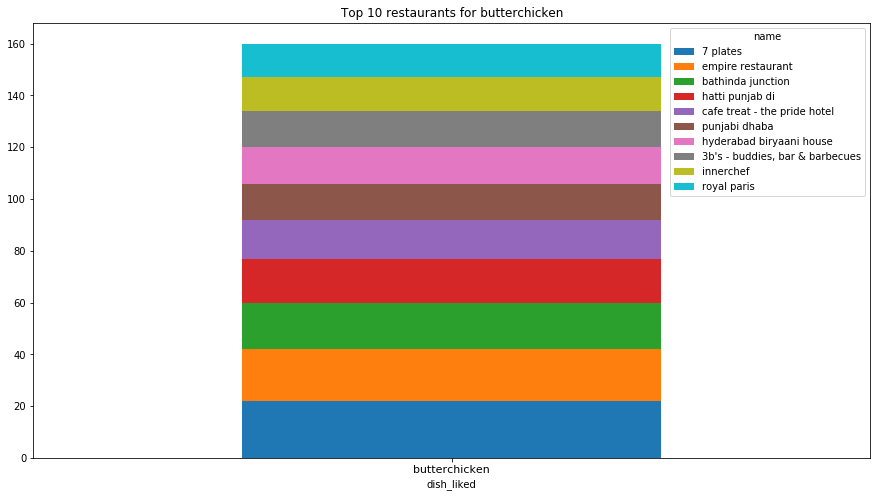

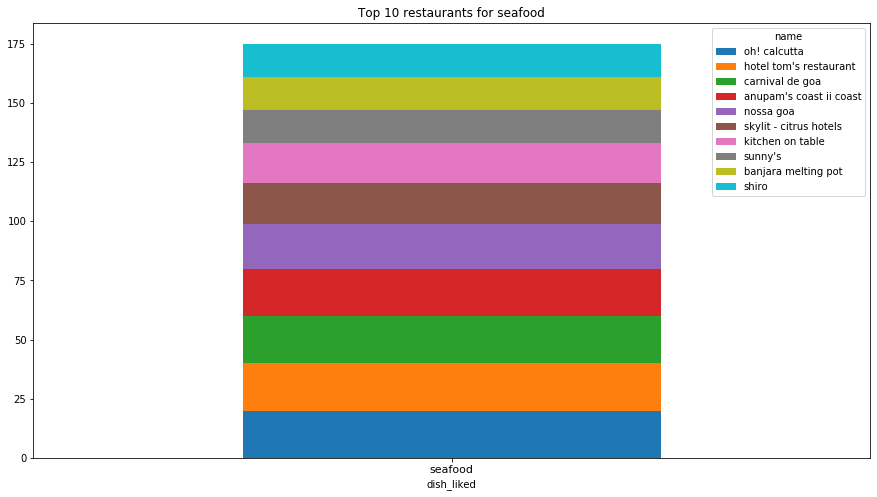

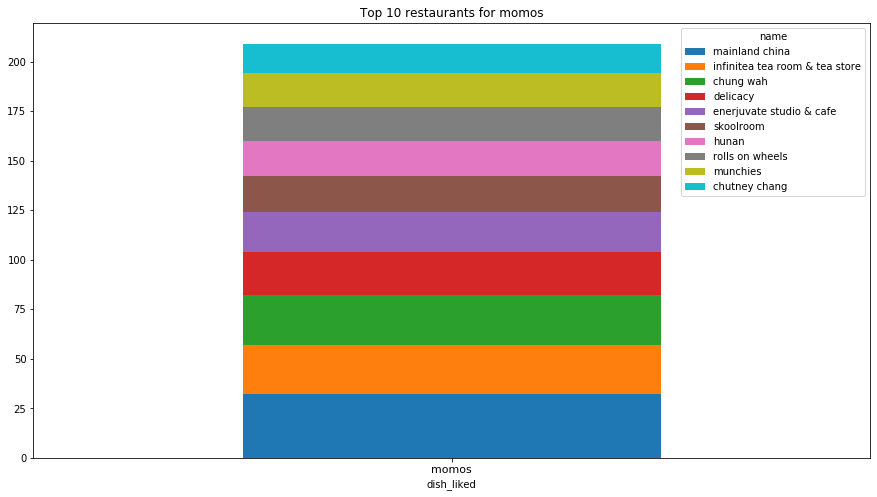

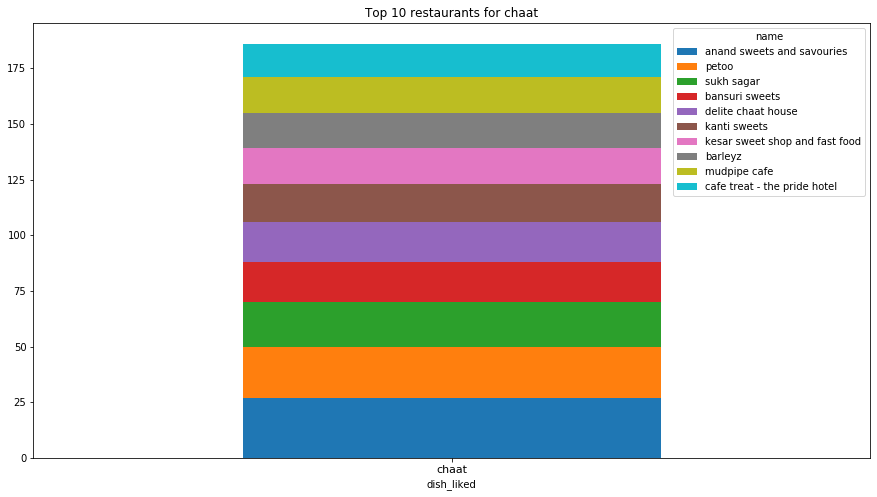

In [98]:
#Columns required
data = dataset[['name','dish_liked']]

#Replace the whitespaces between the cuisines ie north indian --> northindian
data['dish_liked'] = data['dish_liked'].str.replace(" ","")

data = data[data['dish_liked'] != 'Missing']
data.head()

#Convert the comma separated values in cuisines to columns where each column is represented by a cuisine
df = data.set_index('name')['dish_liked'].str.split(',',expand=True).stack().reset_index(level=1,drop=True).reset_index(name='dish_liked')
df2 = df.groupby(['name','dish_liked'])['name'].count().unstack('dish_liked').fillna(0)

#Add a new column which represent total of each row
df2['rtotal'] = df2.sum(axis=1)

#Add a new row which represent the total of each column
df2.loc['ctotal'] = df2.sum(numeric_only=True,axis=0)

#Sort the dataframe by 'rtotal' in descending order and then sort by 'ctotal' in descending order so that we'll get sort the
#dataframe by top location and top cuisines
df2 = df2.sort_values(by=['rtotal'],ascending=False)
df2 = df2.T.sort_values('ctotal',ascending=False).T
df2 = df2.T

#Remove rtotal and ctotal from the dataframe
df3 = df2.iloc[1:,1:]

#Plot the top 10 cuisines for top 10 location
for dish in df3.head(25).index:
    data = df3[df3.index==dish]
    data = data.T.sort_values(dish,ascending=False).T
    data = data.iloc[:,0:10]
    data.plot.bar(figsize=(15,8),stacked=True)
    plt.xticks(fontsize=11,rotation=0)
    plt.title("Top 10 restaurants for {}".format(dish))
    plt.show()